# Options Trading Strategy Backtesting Analysis

This notebook analyzes option trading opportunities based on probability predictions and distance from at-the-money (ATM) strikes. 

## Overview
- **Data Source**: Option model results with probability predictions
- **Strategy**: Trade options when probability exceeds statistical thresholds
- **Risk Management**: Fixed risk per trade ($5,000)
- **Analysis Period**: Multi-year backtesting with year-over-year comparison

## Key Metrics
- **Distance from ATM**: Measured in percentage terms 
- **Probability Threshold**: Mean + 1 standard deviation per distance bucket
- **Return Calculation**: Entry at close vs exit at 15:30 next day
- **Portfolio Management**: $100,000 starting capital, position sizing based on risk

In [ ]:
# Import required libraries for data analysis
import pandas as pd

In [ ]:
# Load the option model results CSV file
# This contains historical option data with probability predictions
df = pd.read_csv('/home/mrmath/Downloads/vwap_model_/option_model/option_model_results.csv')
df

,option,timestamp,open,high,low,close,volume,datetime,close_spy,ATM_strike,...,close_datetime,seconds_since_open,seconds_until_close,year,pct_gain_15_30,side_aware_dist_from_ATM,option_ret_from_open,prediction,probability,train_years
0,O:SPY230103C00376000,1672763400000,3.98,3.98,3.98,3.98,10,2023-01-03 11:30:00-05:00,379.4900,379,...,2023-01-03 16:00:00-05:00,7200.0,16200.0,2023,0.233668,0.007916,0.0,0,0.486690,[np.int32(2022)]
1,O:SPY230103C00376000,1672763700000,3.69,3.91,3.69,3.89,5,2023-01-03 11:35:00-05:00,379.6400,379,...,2023-01-03 16:00:00-05:00,7500.0,15900.0,2023,0.262211,0.007916,-9.0,1,0.542211,[np.int32(2022)]
2,O:SPY230103C00376000,1672764000000,3.79,3.79,3.60,3.60,6,2023-01-03 11:40:00-05:00,379.1000,379,...,2023-01-03 16:00:00-05:00,7800.0,15600.0,2023,0.363889,0.007916,-38.0,0,0.421251,[np.int32(2022)]
3,O:SPY230103C00376000,1672764300000,3.23,3.28,3.15,3.28,81,2023-01-03 11:45:00-05:00,379.1080,379,...,2023-01-03 16:00:00-05:00,8100.0,15300.0,2023,0.496951,0.007916,-70.0,0,0.345260,[np.int32(2022)]
4,O:SPY230103C00376000,1672764600000,3.00,3.36,3.00,3.15,113,2023-01-03 11:50:00-05:00,378.9821,378,...,2023-01-03 16:00:00-05:00,8400.0,15000.0,2023,0.558730,0.005291,-83.0,0,0.390624,[np.int32(2022)]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169285,O:SPY251231P00689000,1767211800000,5.74,6.04,5.73,5.83,504,2025-12-31 15:10:00-05:00,683.2400,683,...,2025-12-31 16:00:00-05:00,20400.0,3000.0,2025,-0.022298,-0.008785,161.0,0,0.438494,"[np.int32(2022), np.int32(2023), np.int32(2024)]"
1169286,O:SPY251231P00689000,1767212100000,5.75,5.75,5.50,5.55,312,2025-12-31 15:15:00-05:00,683.4100,683,...,2025-12-31 16:00:00-05:00,20700.0,2700.0,2025,0.027027,-0.008785,133.0,0,0.474764,"[np.int32(2022), np.int32(2023), np.int32(2024)]"
1169287,O:SPY251231P00689000,1767212400000,5.78,6.18,5.70,6.11,321,2025-12-31 15:20:00-05:00,682.9300,682,...,2025-12-31 16:00:00-05:00,21000.0,2400.0,2025,-0.067103,-0.010264,189.0,0,0.422211,"[np.int32(2022), np.int32(2023), np.int32(2024)]"
1169288,O:SPY251231P00689000,1767212700000,5.99,6.43,5.99,6.23,67,2025-12-31 15:25:00-05:00,682.7200,682,...,2025-12-31 16:00:00-05:00,21300.0,2100.0,2025,-0.085072,-0.010264,201.0,0,0.402408,"[np.int32(2022), np.int32(2023), np.int32(2024)]"


In [ ]:
# Examine the available columns in our dataset
df.columns

Index(['option', 'timestamp', 'open', 'high', 'low', 'close', 'volume',
       'datetime', 'close_spy', 'ATM_strike', 'strike_price', 'dist_from_ATM',
       'close_in_cents', 'pos_in_day_range', 'close_5m_ago', 'price_change_5m',
       'rolling_min_5m', 'rolling_max_5m', 'rolling_std_5m',
       'pos_in_rolling_range_5m', 'directional_rolling_std_5m',
       'close_10m_ago', 'price_change_10m', 'rolling_min_10m',
       'rolling_max_10m', 'rolling_std_10m', 'pos_in_rolling_range_10m',
       'directional_rolling_std_10m', 'close_15m_ago', 'price_change_15m',
       'rolling_min_15m', 'rolling_max_15m', 'rolling_std_15m',
       'pos_in_rolling_range_15m', 'directional_rolling_std_15m',
       'close_30m_ago', 'price_change_30m', 'rolling_min_30m',
       'rolling_max_30m', 'rolling_std_30m', 'pos_in_rolling_range_30m',
       'directional_rolling_std_30m', 'close_60m_ago', 'price_change_60m',
       'rolling_min_60m', 'rolling_max_60m', 'rolling_std_60m',
       'pos_in_rolling_range

In [ ]:
# Convert side-aware distance from ATM to percentage terms
# This makes it easier to interpret how far out-of-the-money each option is
df['dist_atm_pct'] = df['side_aware_dist_from_ATM'] * 100

In [ ]:
# Display the new distance percentage alongside option prices
# This helps us understand the relationship between strike distance and option cost
df[['dist_atm_pct', 'close_in_cents']]

,dist_atm_pct,close_in_cents
0,0.791557,398.0
1,0.791557,389.0
2,0.791557,360.0
3,0.791557,328.0
4,0.529101,315.0
...,...,...
1169285,-0.878477,583.0
1169286,-0.878477,555.0
1169287,-1.026393,611.0
1169288,-1.026393,623.0


In [ ]:
import numpy as np
import pandas as pd

df = df.copy()

# STEP 1: Create rounded distance buckets for statistical analysis
# Round to nearest 0.5% and clip extreme values to avoid sparse data
df["dist_otm_pct_rounded"] = ((df["dist_atm_pct"] * 2).round() / 2).clip(lower=-3, upper=3)

# STEP 2: Calculate statistical thresholds per distance bucket
# Group by rounded distance to compute mean and standard deviation of probabilities
group_stats = df.groupby("dist_otm_pct_rounded")["probability"]

df["mean_prob"] = group_stats.transform("mean")
df["std_prob"]  = group_stats.transform("std")

# STEP 3: Define probability threshold for trade entry
# Only trade when probability exceeds mean + 1 standard deviation for that distance bucket
threshold = df["mean_prob"] + 1 * df["std_prob"]

# STEP 4: Apply trading filters
mask = (
    (df["year"] != 2022) &  # Exclude 2022 data (possibly for out-of-sample testing)
    (df["probability"] > threshold)  # Only high-probability opportunities
)

# STEP 5: Calculate returns (entry at close vs exit at 15:30 next day)
# This simulates buying at close and selling at 3:30 PM the following day
df["ret"] = (df["price_at_15_30"] - df["close_in_cents"]) / df["close_in_cents"]

# STEP 6: Create filtered dataset with only qualifying trades
ret_df = df.loc[mask, :].copy()
ret_df

,option,timestamp,open,high,low,close,volume,datetime,close_spy,ATM_strike,...,side_aware_dist_from_ATM,option_ret_from_open,prediction,probability,train_years,dist_atm_pct,dist_otm_pct_rounded,mean_prob,std_prob,ret
1,O:SPY230103C00376000,1672763700000,3.69,3.91,3.69,3.89,5,2023-01-03 11:35:00-05:00,379.640,379,...,0.007916,-9.0,1,0.542211,[np.int32(2022)],0.791557,1.0,0.260661,0.241285,0.262211
13,O:SPY230103C00376000,1672767300000,3.81,3.81,3.81,3.81,1,2023-01-03 12:35:00-05:00,379.470,379,...,0.007916,-17.0,1,0.520176,[np.int32(2022)],0.791557,1.0,0.260661,0.241285,0.288714
19,O:SPY230103C00376000,1672769100000,2.83,2.83,2.83,2.83,1,2023-01-03 13:05:00-05:00,378.560,378,...,0.005291,-115.0,1,0.509430,[np.int32(2022)],0.529101,0.5,0.307544,0.200702,0.734982
26,O:SPY230103C00376000,1672773900000,2.95,3.05,2.95,3.05,2,2023-01-03 14:25:00-05:00,378.990,378,...,0.005291,-93.0,1,0.522888,[np.int32(2022)],0.529101,0.5,0.307544,0.200702,0.609836
28,O:SPY230103C00376000,1672774500000,2.46,2.55,2.46,2.47,153,2023-01-03 14:35:00-05:00,378.390,378,...,0.005291,-151.0,1,0.517665,[np.int32(2022)],0.529101,0.5,0.307544,0.200702,0.987854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169281,O:SPY251231P00689000,1767210600000,4.61,4.80,4.61,4.74,199,2025-12-31 14:50:00-05:00,684.105,684,...,-0.007310,52.0,0,0.449804,"[np.int32(2022), np.int32(2023), np.int32(2024)]",-0.730994,-0.5,0.290873,0.149013,0.202532
1169282,O:SPY251231P00689000,1767210900000,4.93,4.93,4.80,4.81,14,2025-12-31 14:55:00-05:00,684.140,684,...,-0.007310,59.0,0,0.443855,"[np.int32(2022), np.int32(2023), np.int32(2024)]",-0.730994,-0.5,0.290873,0.149013,0.185031
1169283,O:SPY251231P00689000,1767211200000,4.95,5.50,4.95,5.36,22,2025-12-31 15:00:00-05:00,683.630,683,...,-0.008785,114.0,0,0.430007,"[np.int32(2022), np.int32(2023), np.int32(2024)]",-0.878477,-1.0,0.236054,0.192985,0.063433
1169285,O:SPY251231P00689000,1767211800000,5.74,6.04,5.73,5.83,504,2025-12-31 15:10:00-05:00,683.240,683,...,-0.008785,161.0,0,0.438494,"[np.int32(2022), np.int32(2023), np.int32(2024)]",-0.878477,-1.0,0.236054,0.192985,-0.022298


In [ ]:
# Calculate the average return across all qualifying trades
# This gives us the basic profitability of our strategy
ret_df['ret'].mean()

np.float64(-0.0038059774032136893)

In [ ]:
# Convert datetime to proper timezone (UTC to Eastern Time)
# This ensures we're working with market hours correctly
ret_df['datetime'] = pd.to_datetime(ret_df['datetime'], utc=True).dt.tz_convert('America/New_York')

In [ ]:
# Examine the 'side' column to understand call vs put distribution
# This helps us understand our option types (calls vs puts)
ret_df['side']

1          1
13         1
19         1
26         1
28         1
          ..
1169281   -1
1169282   -1
1169283   -1
1169285   -1
1169286   -1
Name: side, Length: 260801, dtype: int64

In [ ]:
ret_df = ret_df.sort_values(
    ['dist_otm_pct_rounded', 'side', 'datetime']
)

# Extract trading date
ret_df['date'] = ret_df['datetime'].dt.date

# Keep first trade per (OTM, Call/Put, Day)
filtered = (
    ret_df
    .groupby(['dist_otm_pct_rounded', 'side', 'date'])
    .first()
    .reset_index()
)

# Rebuild dictionary
otm_ret = dict(tuple(
    filtered.groupby('dist_otm_pct_rounded')
))


In [ ]:
summary = []

for dist, g in otm_ret.items():
    
    start_capital = 100000  # $100,000 starting capital
    g = g.reset_index(drop=True)
    day_amt = None
    dates = set()
    for i in range(len(g)):
        
        entry = g.loc[i, 'close_in_cents'] /100         # e.g. 150 = $1.50
        exit_ = g.loc[i, 'price_at_15_30'] / 100        # also in cents
        date = g.loc[i, 'date']
        if entry <= 0 or exit_ <= 0:
            continue
        if date not in dates:
            day_amt = 5000
            dates.add(date)
        trade_amount = day_amt
        
        # cost per contract in dollars = entry
        contracts = int(trade_amount / entry)
        
        if contracts == 0:
            print(f"Skipping trade at index {i} for dist {dist} due to insufficient capital for even 1 contract.")
            continue
        
        pnl = contracts * (exit_ - entry) / 100  # convert cents PnL to dollars
        
        start_capital += pnl
    
    summary.append({
        'dist_otm_pct_rounded': dist,
        'final_capital': start_capital,
        'total_return_pct': (start_capital - 100000) / 100000 * 100,
        'number_of_trades': len(g)

    })

summary_df = pd.DataFrame(summary).sort_values("dist_otm_pct_rounded")
summary_df

,dist_otm_pct_rounded,final_capital,total_return_pct,number_of_trades
0,-3.0,100004.73,0.00473,74
1,-2.5,100004.92,0.00492,204
2,-2.0,99586.31,-0.41369,469
3,-1.5,100419.97,0.41997,699
4,-1.0,99374.40,-0.62560,762
5,-0.5,98824.60,-1.17540,818
6,-0.0,100157.40,0.15740,1292
7,0.5,100425.49,0.42549,754
8,1.0,100621.48,0.62148,751
9,1.5,100517.20,0.51720,733


In [ ]:
import pandas as pd

# ============================================================================
# ENHANCED EQUITY CURVE ANALYSIS WITH YEAR-BY-YEAR BREAKDOWN
# ============================================================================
# This section creates detailed equity curves and analyzes performance by year
# to better understand strategy consistency and time-based performance patterns

equity_curves = {}  # Store equity curves for each OTM distance
    # Initialize tracking variables for this OTM strategy
    start_capital = 100_000
    g = g.sort_values('datetime').reset_index(drop=True)  # Ensure chronological order
    
    # Lists to track equity curve progression
    equity_path = []   # Capital after each trade
    datetimes = []     # Corresponding timestamps
    
    # Trading state variables
    current_date = None
    trades_taken = 0
    total_risked = 0   # Track total amount risked across all trades
    
    # Process each trade chronologically to build equity curve
    for i in range(len(g)):
        # Convert prices from cents to dollars
        entry = g.loc[i, 'close_in_cents'] / 100    # Entry price in dollars
        exit_ = g.loc[i, 'price_at_15_30'] / 100     # Exit price in dollars
        dt = g.loc[i, 'datetime']
        
        # Skip invalid price data
        if entry <= 0 or exit_ <= 0:
            continue
        
        # Reset daily risk amount for new trading days
        if dt.date() != current_date:
            current_date = dt.date()
            day_amt = trade_risk  # $5,000 risk per new day
        contracts = int(day_amt / entry)
        # Calculate position size (number of contracts)
        contracts = int(day_amt / entry)
        if contracts == 0:  # Can't afford even one contract
            continue
        start_capital += pnl
        # Calculate P&L as percentage return × position size
        pnl = contracts * (exit_ - entry)  # Direct dollar P&L calculation
        start_capital += pnl
    # Store the complete equity curve for this OTM distance
    equity_curves[dist] = pd.Series(equity_path, index=datetimes)
    
    # Create year-by-year performance breakdown
    # This helps identify which years were profitable vs unprofitable
    yearly_summary = g.groupby('year').agg(
        trades_taken=('ret', 'count'),    # Number of trades per year
        avg_ret=('ret', 'mean'),          # Average return per trade
    ).reset_index()
    
    # Add calculated performance metrics for each year
    yearly_summary['dist_otm_pct_rounded'] = dist
    yearly_summary['total_risked'] = yearly_summary['trades_taken'] * trade_risk  # Total capital risked
    yearly_summary['final_capital'] = 100_000 + yearly_summary['avg_ret'] * yearly_summary['total_risked']
    yearly_summary['pct_return'] = 100 * (yearly_summary['final_capital'] - 100_000) / 100_000  # Annual return %
# Combine all years and OTM strategies into a comprehensive results table
# This creates a matrix showing performance by strategy and year
summary_df = pd.concat(summary, ignore_index=True).sort_values(['dist_otm_pct_rounded','year'])

summary_df[['year', 'dist_otm_pct_rounded', 'trades_taken', 'avg_ret', 'pct_return']]
# Combine all years & OTM slices into a single dataframe
yearly_summary['pct_return'] = 100 * (yearly_summary['final_capital'] - 100_000) / 100_000
# Combine all years & OTM slices into a single dataframe
yearly_summary['pct_return'] = 100 * (yearly_summary['final_capital'] - 100_000) / 100_000

summary_df[['year', 'dist_otm_pct_rounded', 'trades_taken', 'avg_ret', 'pct_return']]

summary_df = pd.concat(summary, ignore_index=True).sort_values(['dist_otm_pct_rounded','year'])
    
summary_df = pd.concat(summary, ignore_index=True).sort_values(['dist_otm_pct_rounded','year'])
    summary_df[['year', 'dist_otm_pct_rounded', 'trades_taken', 'avg_ret', 'pct_return']]

summary_df[['year', 'dist_otm_pct_rounded', 'trades_taken', 'avg_ret', 'pct_return']]
    summary.append(yearly_summary)
summary_df[['year', 'dist_otm_pct_rounded', 'trades_taken', 'avg_ret', 'pct_return']]
    summary.append(yearly_summary)summary_df = pd.concat(summary, ignore_index=True).sort_values(['dist_otm_pct_rounded','year'])


summary_df = pd.concat(summary, ignore_index=True).sort_values(['dist_otm_pct_rounded','year'])

# Combine all years & OTM slices into a single dataframe# Combine all years & OTM slices into a single dataframe

,year,dist_otm_pct_rounded,trades_taken,avg_ret,pct_return
0,2023,-3.0,30,0.016467,2.470082
1,2024,-3.0,14,-0.003623,-0.253623
2,2025,-3.0,30,-0.010796,-1.619402
3,2023,-2.5,89,-0.034892,-15.527031
4,2024,-2.5,48,-0.010287,-2.468953
5,2025,-2.5,67,0.056443,18.908522
6,2023,-2.0,183,-0.032067,-29.340848
7,2024,-2.0,131,-0.012685,-8.308400
8,2025,-2.0,155,-0.006786,-5.259268
9,2023,-1.5,238,-0.034932,-41.568678


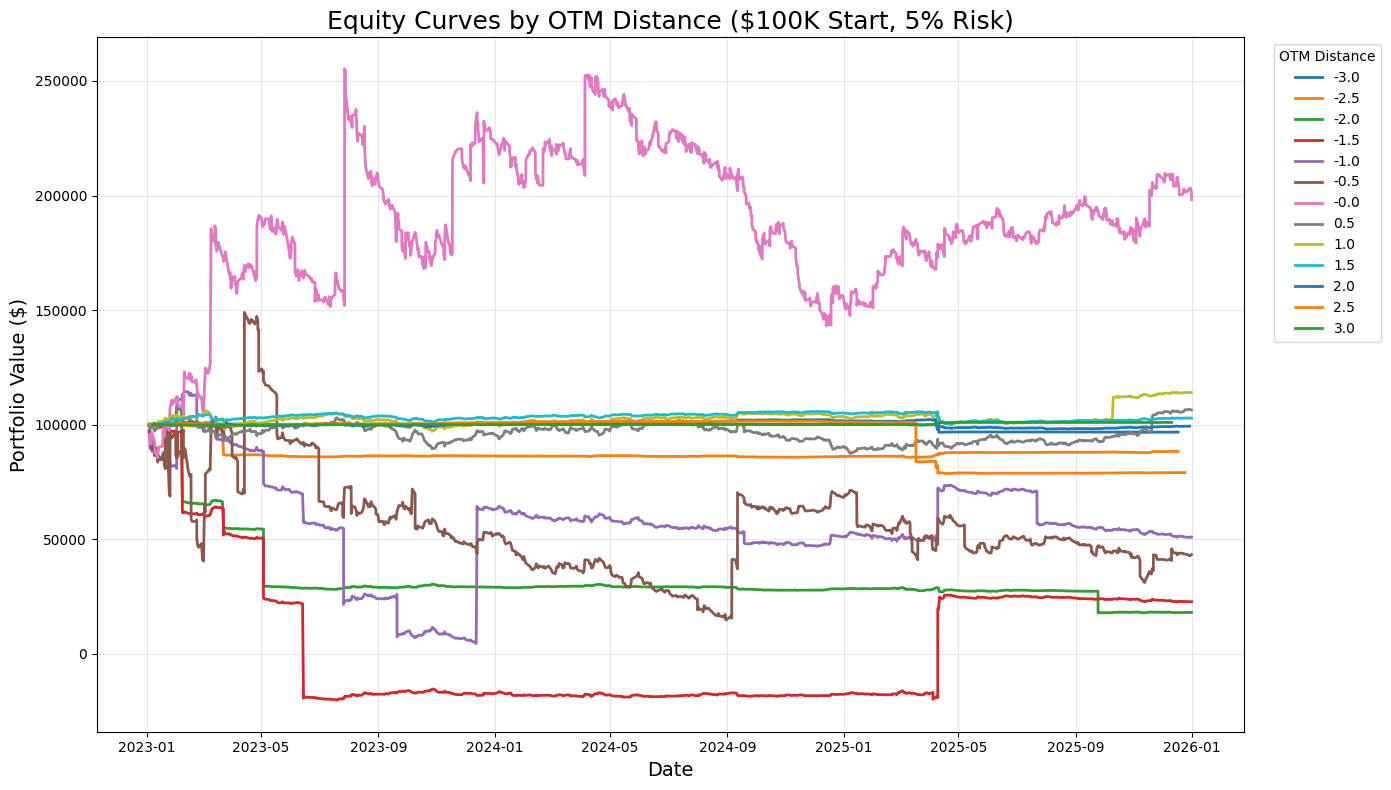

In [ ]:
# ============================================================================
# EQUITY CURVE VISUALIZATION
# ============================================================================
# Create a comprehensive chart showing how each OTM strategy performs over time
# This helps visualize the risk/return profile and consistency of each approach

import matplotlib.pyplot as plt

# Create a large figure to accommodate multiple equity curves
plt.figure(figsize=(14, 8))

# Plot equity curve for each OTM distance strategy
for dist in sorted(equity_curves.keys()):
    curve = equity_curves[dist]
    
    # Skip empty equity curves (strategies with no valid trades)
    if len(curve) < 100:
        continue
        
    # Plot the equity progression over time
    plt.plot(curve.index, curve.values, linewidth=2, label=f"{dist}%")

# Format the chart for clarity and professional presentation
plt.title("Equity Curves by OTM Distance ($100K Start, $5K Risk per Trade)", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Portfolio Value ($)", fontsize=14)

# Add legend showing each strategy, positioned outside the plot area
plt.legend(title="OTM Distance", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(alpha=0.3)           # Light grid for easier reading
plt.tight_layout()            # Optimize layout spacing
plt.show()
